In [469]:
# Importamos las bibliotecas que utilizaremos en el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import mean_squared_error

In [470]:
# Cargamos los database que utilizaremos
df= pd.read_csv('fifa21_male2.csv')

C:\Users\aguva\AppData\Local\Temp\ipykernel_9496\487054140.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('fifa21_male2.csv')


### Exploración inicial 

In [471]:
# Observamos la composición del Database, como se integra y que tipos de datos contine.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [472]:
#Buscamos un ejemplo para ver los datos contenidos.
df.sample()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
16832,258361,S. Kennedy,23,61,Canada,SSV Jahn Regensburg,63,CB,CB,https://cdn.sofifa.com/players/258/361/20_120.png,...,54+2,54+2,52+2,55+2,61+2,61+2,61+2,55+2,16+2,Male


In [473]:
# Realizado un análisis preeliminar seleccionamos las columnas que utilizare en el analisis.

# Ruta del archivo CSV
csv_file = 'fifa21_male2.csv'

# Columnas que seleccionamos
columnas_seleccionadas = ['Age', 'Nationality', 'BP', 'OVA', 'Height', 'Weight', 'foot', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 
'Short Passing', 'Ball Control', 'Acceleration', 'Reactions', 'Stamina', 'Defending', 'Vision']

# Leemos el archivo con las columnas elegidas
df = pd.read_csv(csv_file, usecols= columnas_seleccionadas)

# Imprimir el DataFrame con las columnas seleccionadas
print(df)


       Age  OVA            Nationality   BP Height  Weight   foot  Value  \
0       33   69                  Italy  LWB   6'0"  181lbs   Left  €625K   
1       37   71                  Spain   CM  5'10"  143lbs  Right  €600K   
2       33   71                England  CAM   5'9"  161lbs  Right  €1.1M   
3       36   68  Trinidad &amp; Tobago   ST  5'11"  165lbs  Right     €0   
4       36   81                  Spain  CAM   5'7"  150lbs  Right  €5.5M   
...    ...  ...                    ...  ...    ...     ...    ...    ...   
17120   22   64                 France   CB   6'6"  165lbs  Right  €550K   
17121   18   56                  Wales  CAM  5'10"  170lbs  Right  €130K   
17122   18   56                England   RB   5'9"  154lbs  Right  €130K   
17123   20   62     Bosnia Herzegovina   RB   5'9"  148lbs  Right  €475K   
17124   18   59                  Spain   ST  5'10"  154lbs  Right  €325K   

       Wage Release Clause  ... Attacking  Crossing  Finishing  Short Passing  \
0     

In [474]:
# Vemos un detalle concreto de las columnas solicitdas, si contienen o no nulos, el tipo de dato contenido.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17125 non-null  int64  
 1   OVA             17125 non-null  int64  
 2   Nationality     17125 non-null  object 
 3   BP              17125 non-null  object 
 4   Height          17125 non-null  object 
 5   Weight          17125 non-null  object 
 6   foot            17125 non-null  object 
 7   Value           17125 non-null  object 
 8   Wage            17125 non-null  object 
 9   Release Clause  17125 non-null  object 
 10  Contract        17125 non-null  object 
 11  Attacking       17125 non-null  int64  
 12  Crossing        17125 non-null  int64  
 13  Finishing       17125 non-null  int64  
 14  Short Passing   17125 non-null  int64  
 15  Ball Control    17125 non-null  int64  
 16  Acceleration    17125 non-null  int64  
 17  Reactions       17125 non-null 

In [475]:
# Buscamos los valores unicos de las conlumnas categoricas para saber que tamaño pueden llegar a tener nuestra dummies.
num_val_uni_Nat = df['Nationality'].nunique()
num_val_uni_BP = df['BP'].nunique()


print('Valores unicos de Natinality son', num_val_uni_Nat)
print('Valores unicos de BP son', num_val_uni_BP)



Valores unicos de Natinality son 167
Valores unicos de BP son 15


In [476]:
# Vemos que la columna 'Contract' no aporta valor a nuestro análisis, la quitamos junto con 'Nationality' por su gran cantidad de valores únicos y 
# 'Vision' porque luego de analizado el tipo de caracteristica no considero necesaria.

df = df.drop(['Contract', 'Nationality', 'Vision'], axis=1)


In [477]:
#Vemos un ejemplo del nuestro DataFrame a utilizar
df.sample()

,Age,OVA,BP,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Defending
9839,25,69,LWB,"5'6""",141lbs,Left,€1.2M,€5K,€0,239,71,39,58,67,78,65,87,184


In [478]:
# Convertimos la columna 'Value' a un string para poder transformarla en un int

# Convertimos la columna 'Value' a tipo string
df['Value'] = df['Value'].astype(str)

# Definimos una funcion para realizar la conversion a un número.
def transformar_valor_monetario(valor):
    if 'K' in valor:
        # Valor en miles
        return float(valor.replace('K', '')) * 1000
    elif 'M' in valor:
        # Valor en millones
        return float(valor.replace('M', '')) * 1000000
    else:
        # Valor sin sufijo, asumir valor en unidades
        return float(valor)

# Aplicamos la función personalizada a las columnas 'Value', 'Release Clause' y 'Wage' para transformarlas en valores monetarios


df['Value'] = df['Value'].str.replace('€', '')  # Eliminamos el símbolo de euro si está presente 
df['Value'] = df['Value'].apply(transformar_valor_monetario) #Transformamos

df['Wage'] = df['Wage'].str.replace('€', '')  # Eliminamos el símbolo de euro si está presente 
df['Wage'] = df['Wage'].apply(transformar_valor_monetario) #Transformamos

df['Release Clause'] = df['Release Clause'].str.replace('€', '')  # Elimina el símbolo de euro si está presente
df['Release Clause'] = df['Release Clause'].apply(transformar_valor_monetario) #Transformamos

#Visualizamos los cambios
df

,Age,OVA,BP,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Defending
0,33,69,LWB,"6'0""",181lbs,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,208
1,37,71,CM,"5'10""",143lbs,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,153
2,33,71,CAM,"5'9""",161lbs,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,99
3,36,68,ST,"5'11""",165lbs,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,75
4,36,81,CAM,"5'7""",150lbs,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,"6'6""",165lbs,Right,550000.0,2000.0,0.0,197,35,23,47,56,52,48,59,198
17121,18,56,CAM,"5'10""",170lbs,Right,130000.0,3000.0,273000.0,248,50,43,64,54,61,54,53,132
17122,18,56,RB,"5'9""",154lbs,Right,130000.0,2000.0,273000.0,218,55,34,42,47,66,59,53,163
17123,20,62,RB,"5'9""",148lbs,Right,475000.0,3000.0,784000.0,223,62,26,60,57,72,56,57,180


In [479]:
#Convertimos las columnas de 'Height' y 'Weight' de una unidad de medida imperial a metrica

# Quite las unidades de medida y separe en dos columnas los pies y las pulgadas para que quede mas sencillo el cálculo

df['Weight'] = df['Weight'].replace({'lbs': ''}, regex=True)
df[['pies', 'pulgadas']] = df['Height'].str.split("'", expand=True)
df['pulgadas'] = df['pulgadas'].replace({'"': ''}, regex=True)

# Convierte la columna 'Weight' a tipo int
df['Weight'] = df['Weight'].astype(float)
df['pies'] = df['pies'].astype(int)
df['pulgadas'] = df['pulgadas'].astype(int)

# Convertimos la altura 
df['Altura'] = ((df['pies'] * 30.48) + df['pulgadas'] * 2.54).round(0)

# Convertimos el peso en libras a kilogramos 
df['Weight'] = (df['Weight'] * 0.45359237).round(0)

In [480]:
# Quitamos las columnas que modificamos

df = df.drop(['Height', 'pies', 'pulgadas' ], axis=1)

In [481]:
df.head()

,Age,OVA,BP,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Defending,Altura
0,33,69,LWB,82.0,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,208,183.0
1,37,71,CM,65.0,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,153,178.0
2,33,71,CAM,73.0,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,99,175.0
3,36,68,ST,75.0,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,75,180.0
4,36,81,CAM,68.0,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,181,170.0


In [482]:
# Reordenamos las columnas para continuar con una logica

new_order = ['Age',	'BP', 'Altura',	'Weight', 'foot', 'Value',	'Wage',	'Release Clause',	'Attacking',	'Crossing',	'Finishing',	'Short Passing', 'Ball Control',	'Acceleration',	'Reactions',	'Stamina',	'Defending','OVA']

df = df.reindex(columns=new_order)

In [483]:
#Visualizamos las modificaciones planteadas
df.head()

,Age,BP,Altura,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Defending,OVA
0,33,LWB,183.0,82.0,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,208,69
1,37,CM,178.0,65.0,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,153,71
2,33,CAM,175.0,73.0,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,99,71
3,36,ST,180.0,75.0,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,75,68
4,36,CAM,170.0,68.0,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,181,81


In [484]:
#Pedimos un detalle del DataFrame para asegurarnos que se encuentran en condiciones para comenzar a modelizar.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17125 non-null  int64  
 1   BP              17125 non-null  object 
 2   Altura          17125 non-null  float64
 3   Weight          17125 non-null  float64
 4   foot            17125 non-null  object 
 5   Value           17125 non-null  float64
 6   Wage            17125 non-null  float64
 7   Release Clause  17125 non-null  float64
 8   Attacking       17125 non-null  int64  
 9   Crossing        17125 non-null  int64  
 10  Finishing       17125 non-null  int64  
 11  Short Passing   17125 non-null  int64  
 12  Ball Control    17125 non-null  int64  
 13  Acceleration    17125 non-null  int64  
 14  Reactions       17125 non-null  int64  
 15  Stamina         17125 non-null  int64  
 16  Defending       17125 non-null  int64  
 17  OVA             17125 non-null 

In [485]:
# Creamos un DataFrame unicamente con las columnas categoricas y visulizamos
df_obj= df.select_dtypes(object)

df_obj


,BP,foot
0,LWB,Left
1,CM,Right
2,CAM,Right
3,ST,Right
4,CAM,Right
...,...,...
17120,CB,Right
17121,CAM,Right
17122,RB,Right
17123,RB,Right


In [486]:
# Creamos un DataFrame unicamente con las columnas numericas y visulizamos
df_num= df.select_dtypes(np.number)

df_num.columns

Index(['Age', 'Altura', 'Weight', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Short Passing', 'Ball Control',
       'Acceleration', 'Reactions', 'Stamina', 'Defending', 'OVA'],
      dtype='object')

<Axes: >

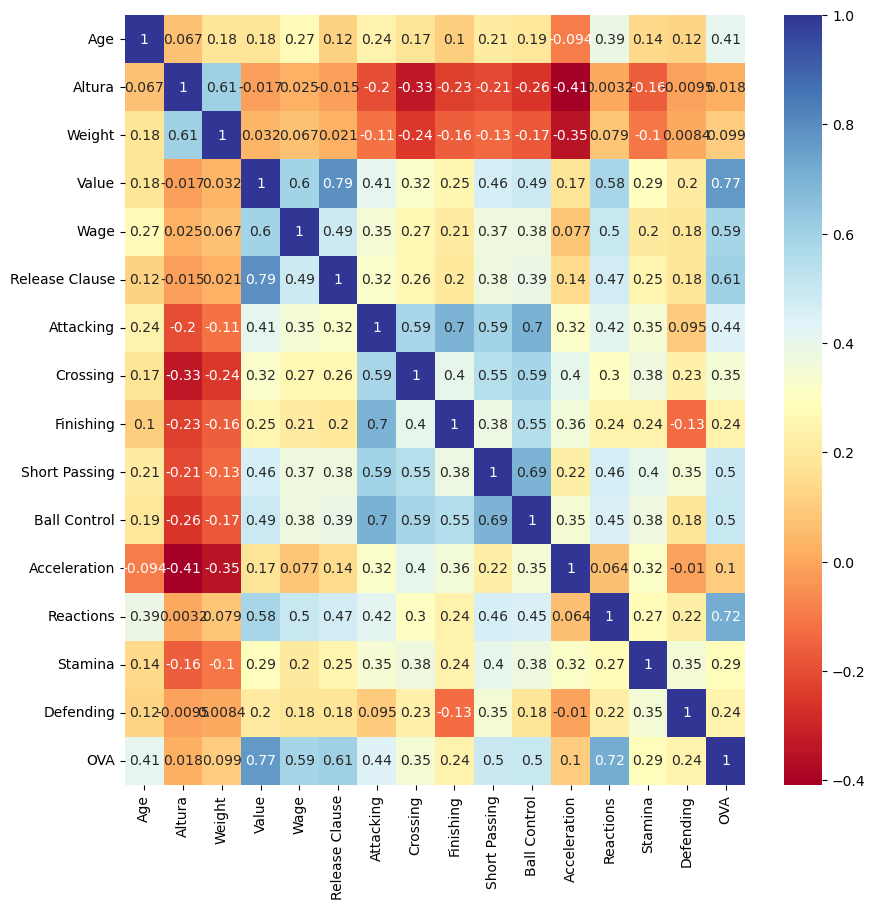

In [487]:
# Realizamos un heatmap para observar la correlación

corr_matrix= df_num.corr(method= 'kendall')

plt.figure(figsize=(10, 10))  # Ajustamos el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')

# Mas alla de que exista una correlación alta entre la altura, el peso y la aceleración considero que es necesaria para la aplicacion del modelo.


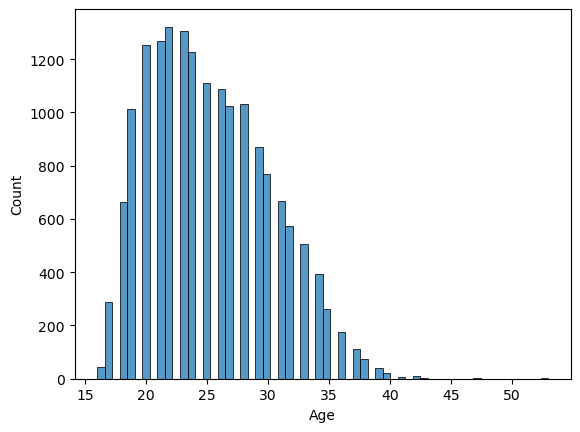

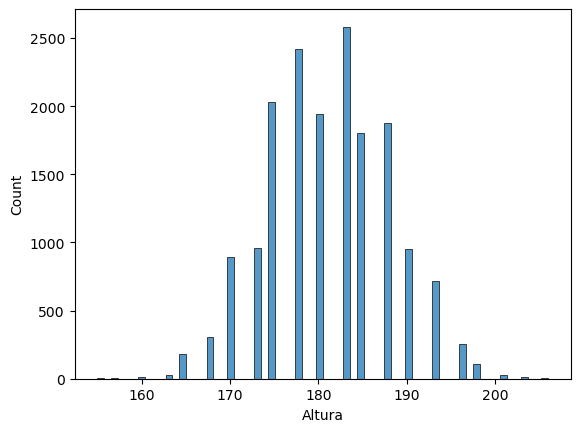

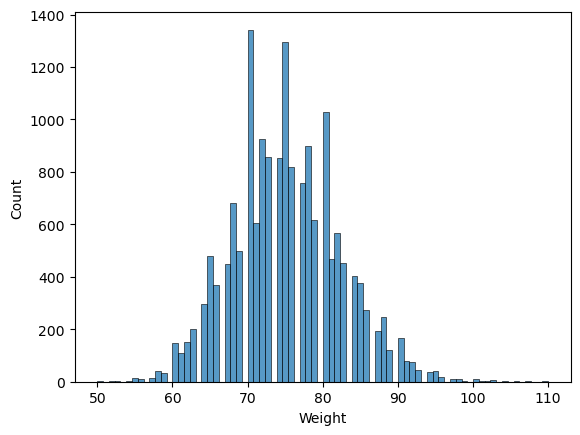

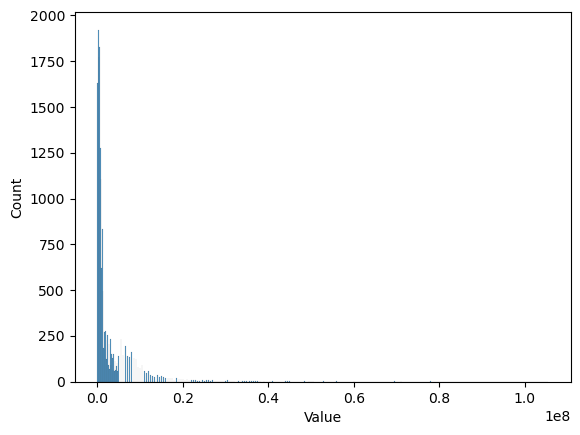

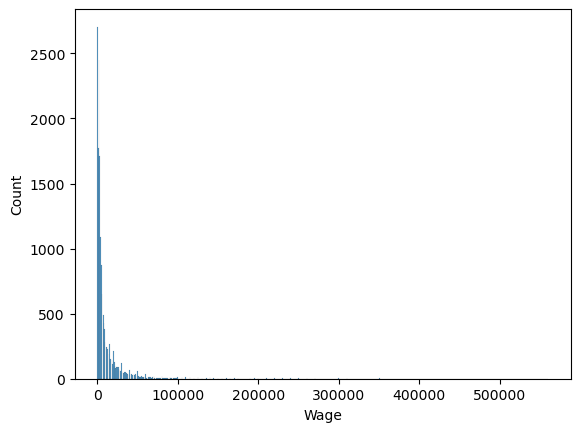

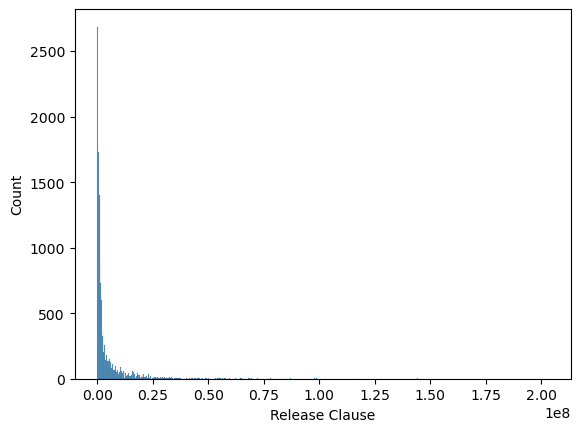

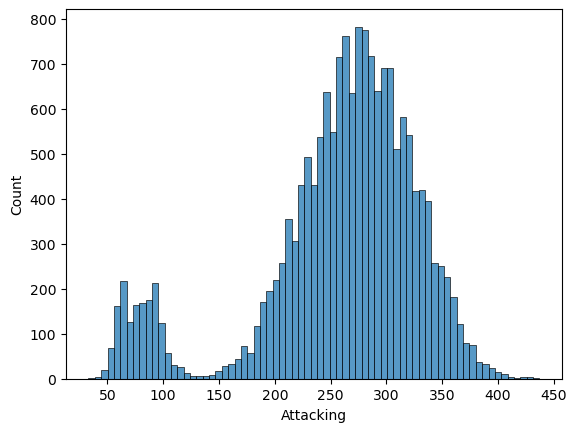

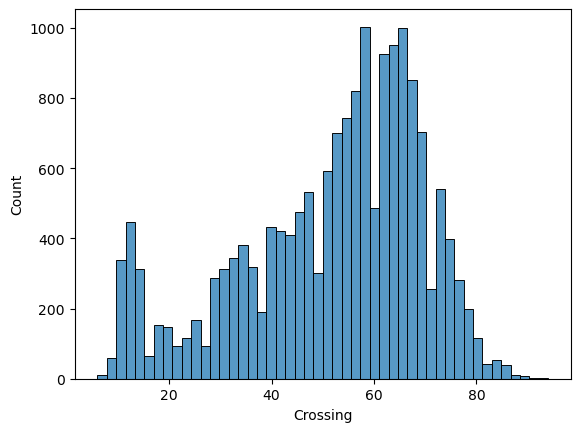

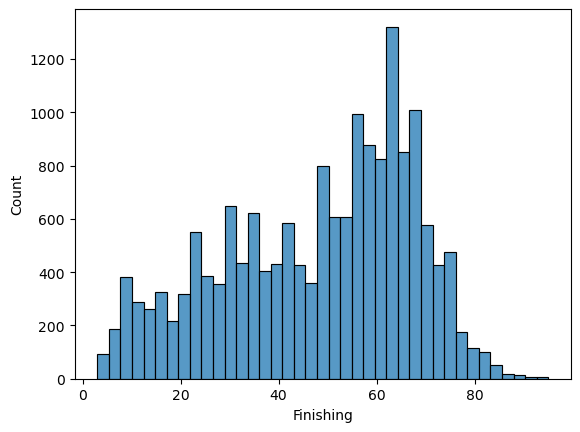

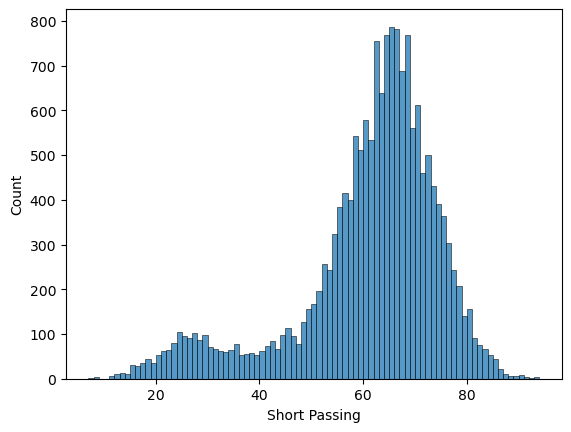

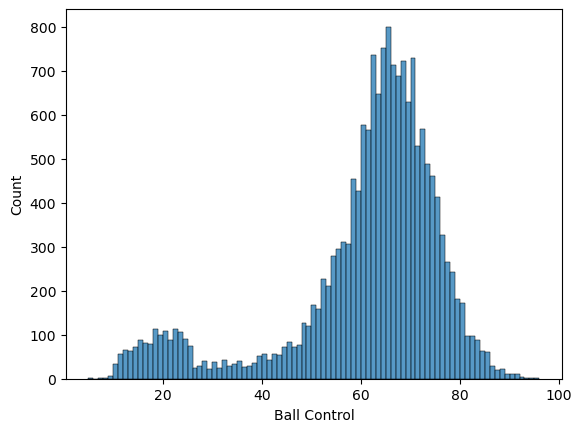

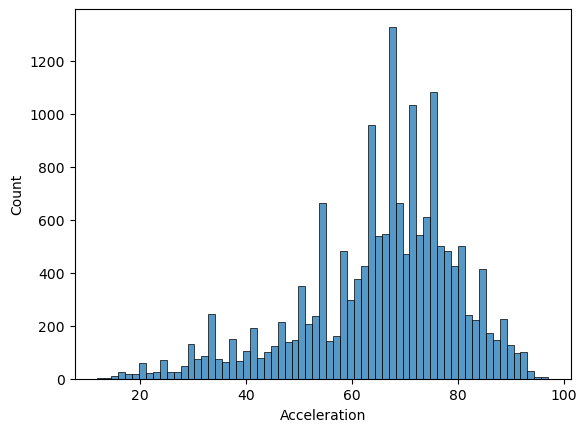

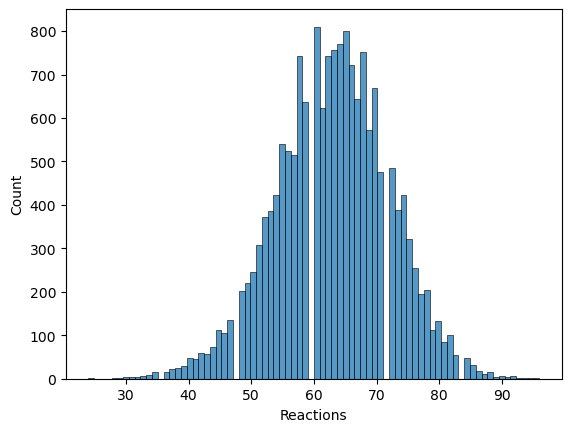

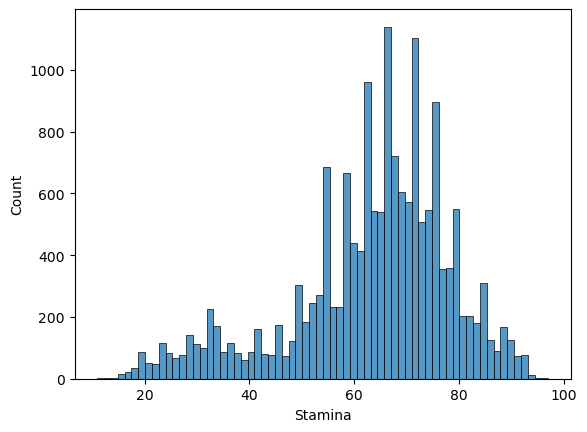

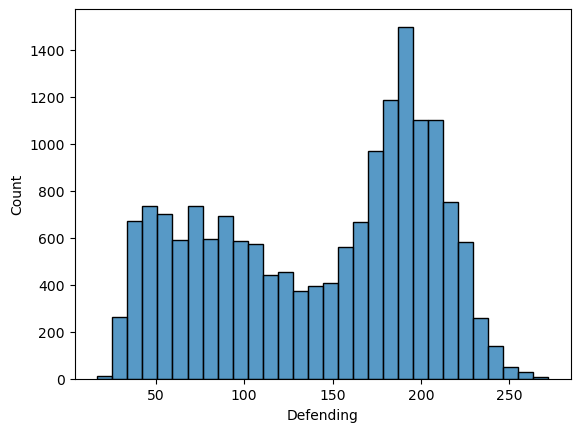

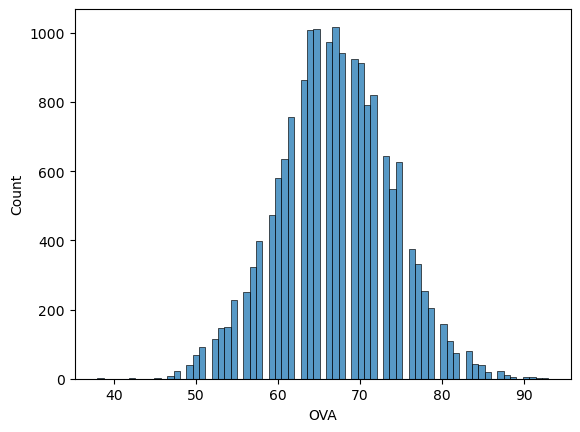

In [488]:
# Creamos los gráficos de distribución de las variables numericas

for column in df_num.columns:
    sns.histplot(df_num[column])
    plt.show()

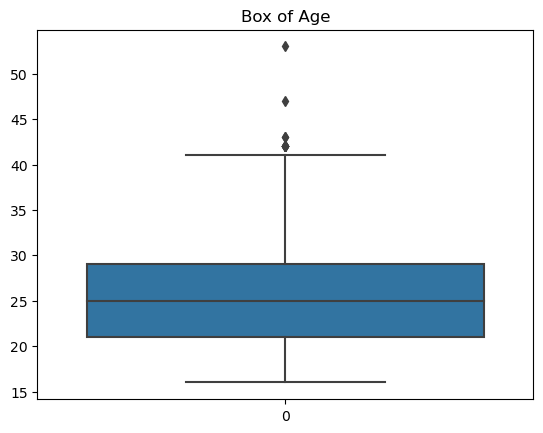

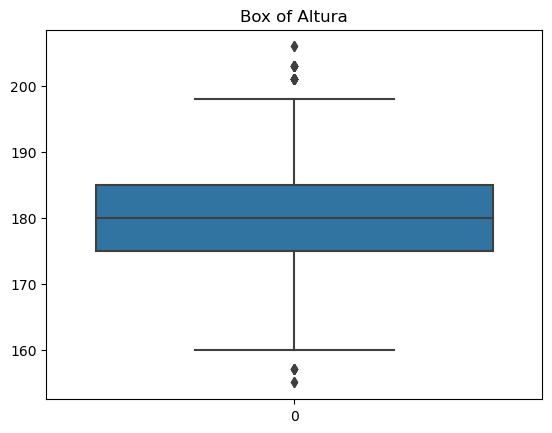

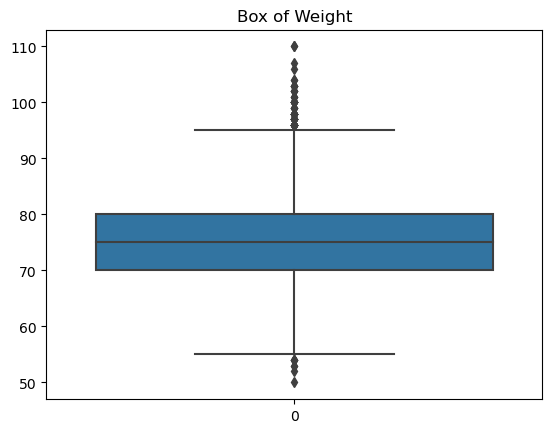

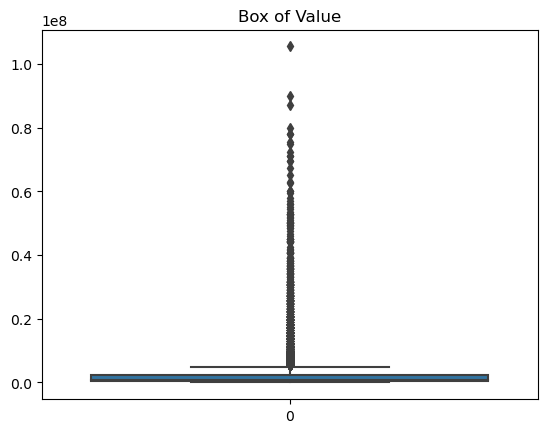

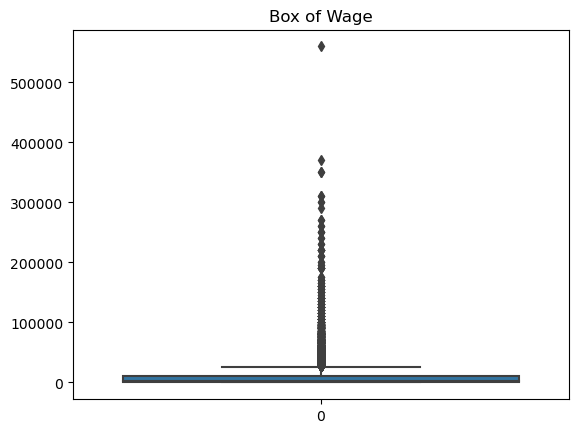

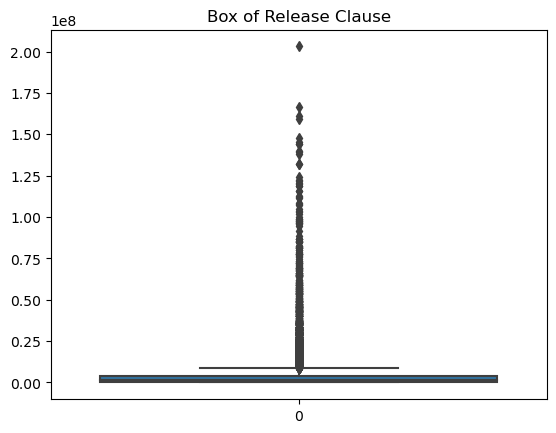

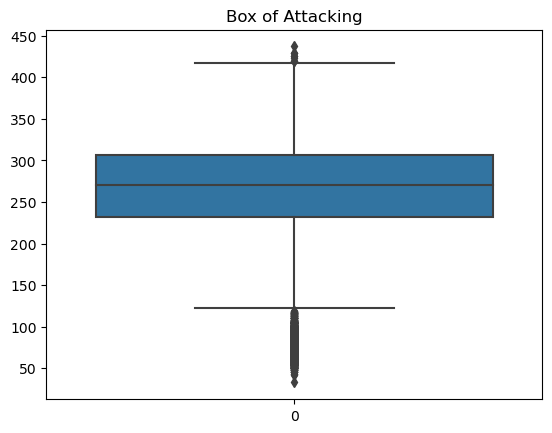

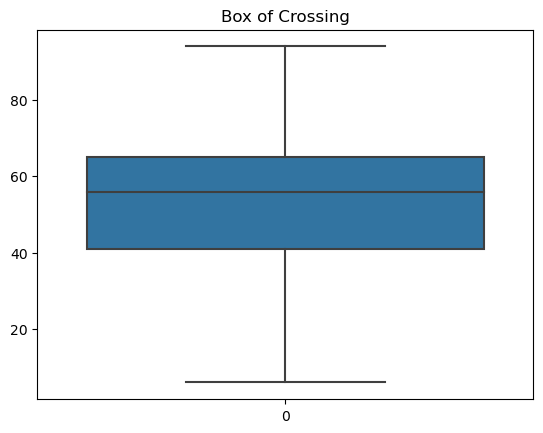

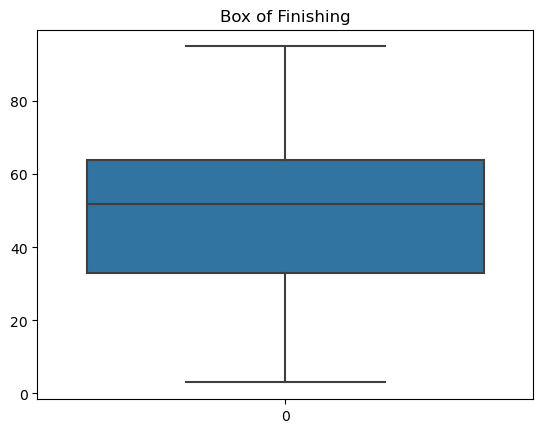

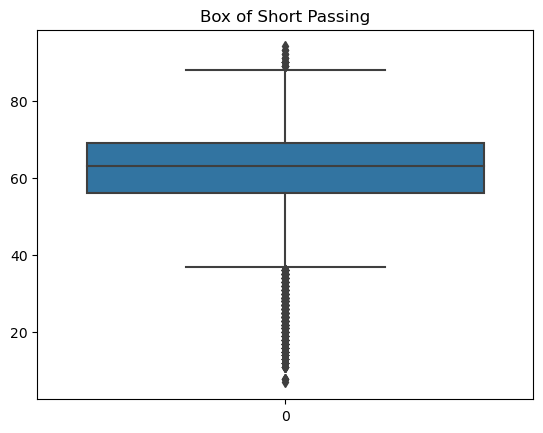

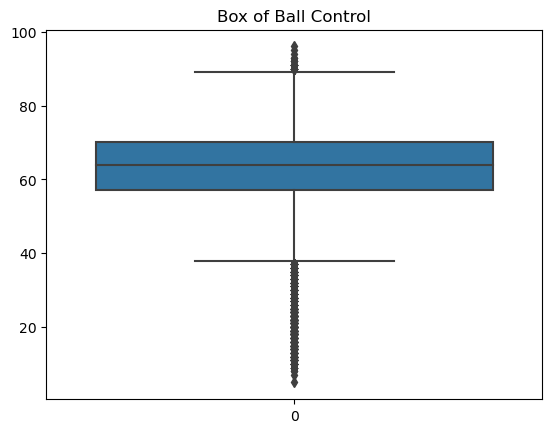

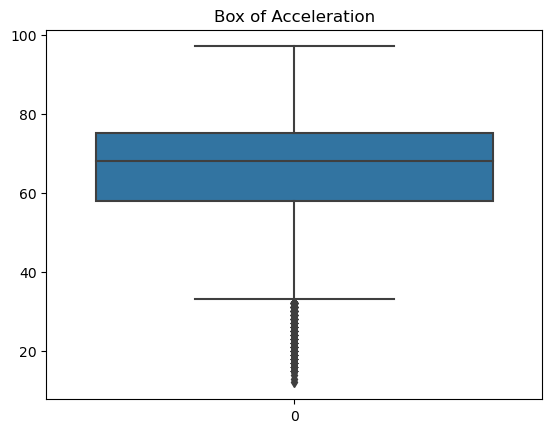

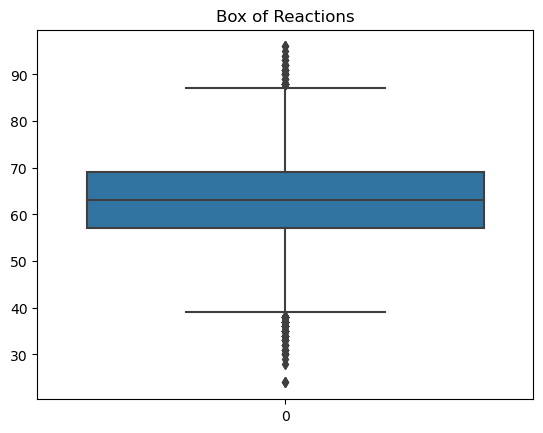

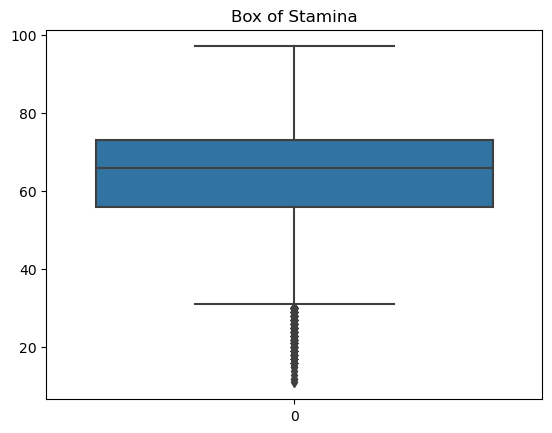

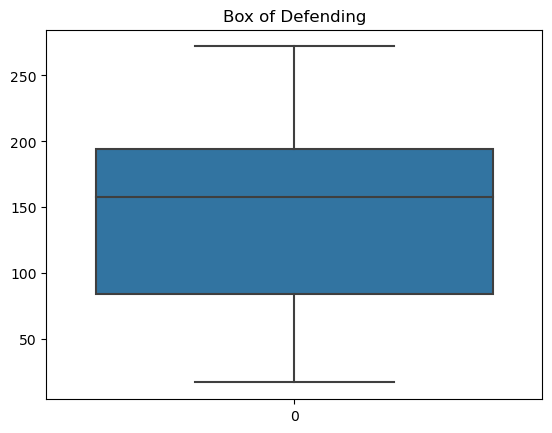

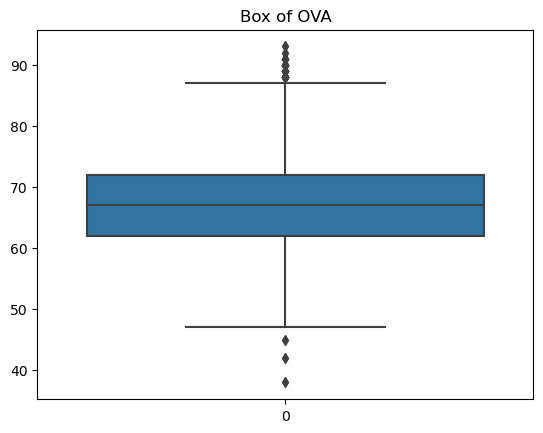

In [489]:
#Creamos los graficos de Boxplot para visualizar los outliders que tenemos por cada una de las columnas numericas con el objetivo de mejorar nuestro DataFrame
for column in df_num.columns:
    sns.boxplot(df_num[column])
    plt.title(f"Box of {column}")
    plt.show()

In [490]:
df_num.columns

Index(['Age', 'Altura', 'Weight', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Short Passing', 'Ball Control',
       'Acceleration', 'Reactions', 'Stamina', 'Defending', 'OVA'],
      dtype='object')

Normalizamos los datos para eliminar las difrencias de escala entre las variables ya que facilita la comprensión y el análisis de datos.

            Age    Altura    Weight     Value      Wage  Release Clause  \
0      0.459459  0.549020  0.533333  0.005924  0.012500        0.000000   
1      0.567568  0.450980  0.250000  0.005687  0.012500        0.005416   
2      0.459459  0.392157  0.383333  0.010427  0.026786        0.000000   
3      0.540541  0.490196  0.416667  0.000000  0.000000        0.000000   
4      0.540541  0.294118  0.300000  0.052133  0.021429        0.035451   
...         ...       ...       ...       ...       ...             ...   
17120  0.162162  0.843137  0.416667  0.005213  0.003571        0.000000   
17121  0.054054  0.450980  0.450000  0.001232  0.005357        0.001344   
17122  0.054054  0.392157  0.333333  0.001232  0.003571        0.001344   
17123  0.108108  0.392157  0.283333  0.004502  0.005357        0.003860   
17124  0.054054  0.450980  0.333333  0.003081  0.003571        0.003880   

       Attacking  Crossing  Finishing  Short Passing  Ball Control  \
0       0.693069  0.784091   

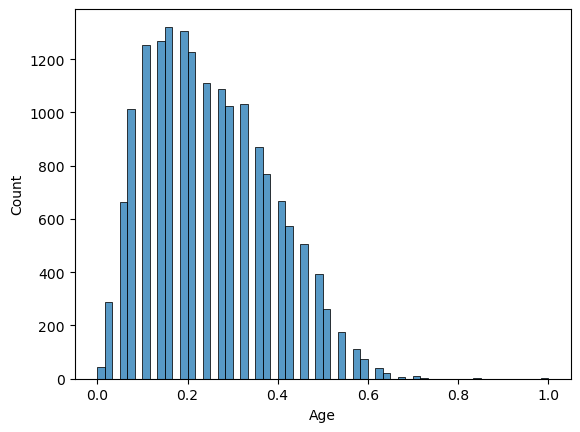

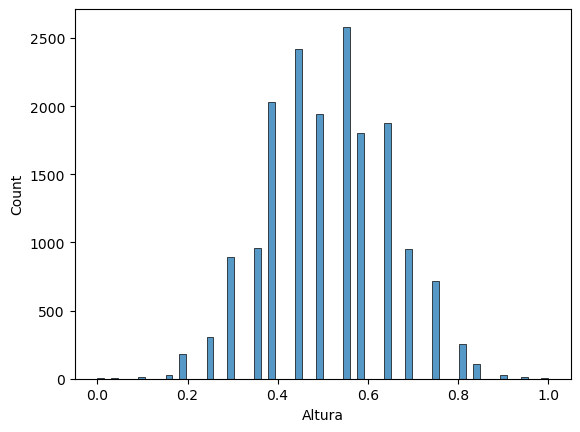

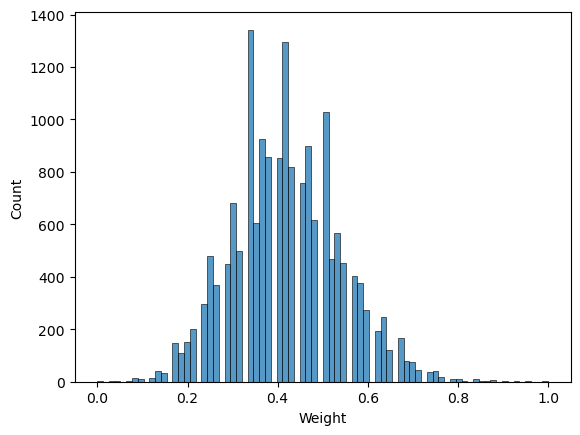

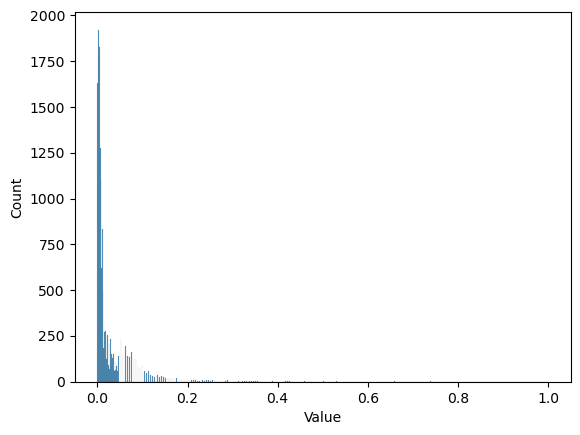

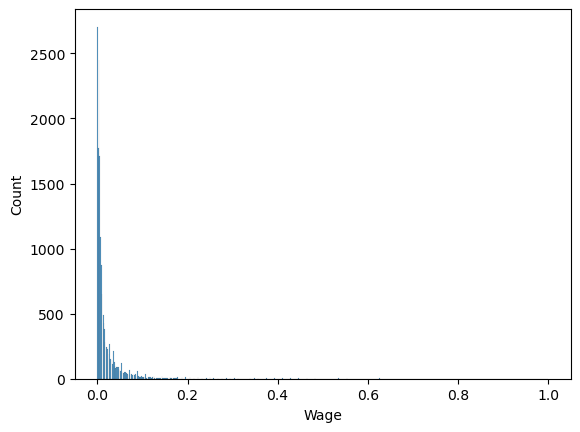

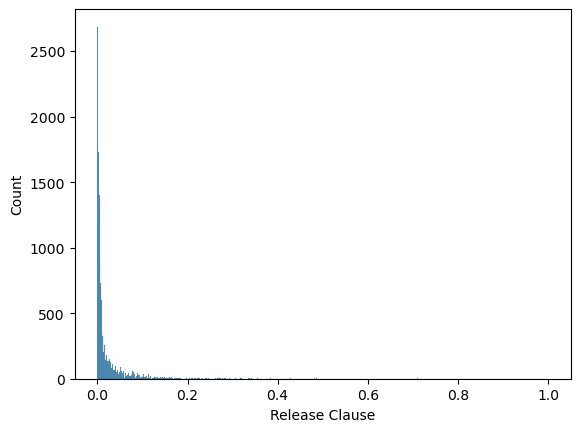

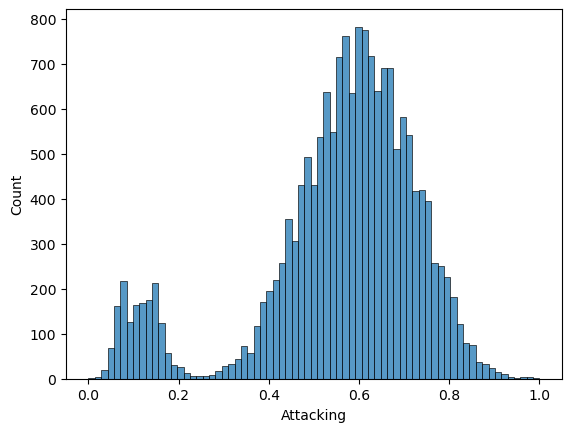

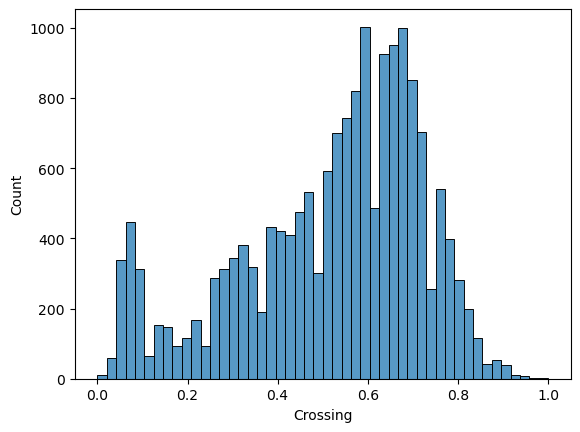

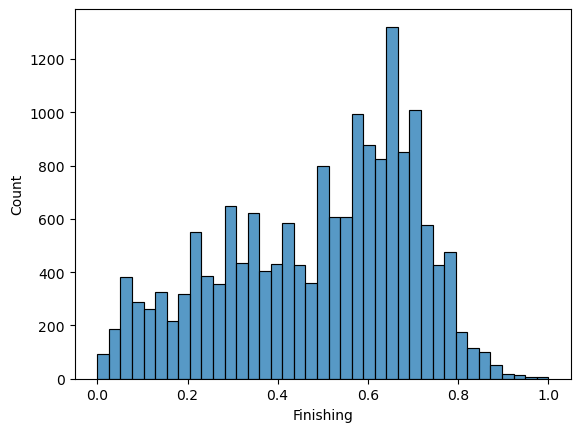

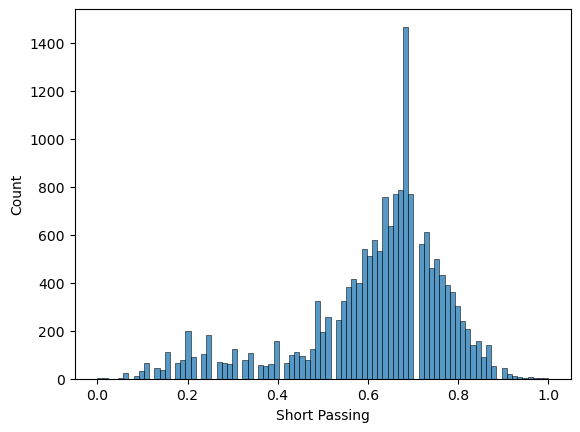

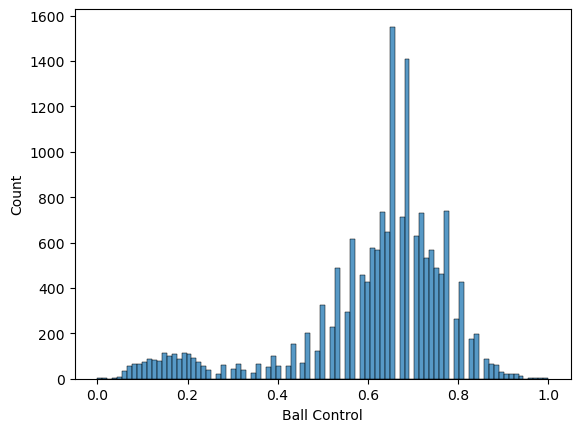

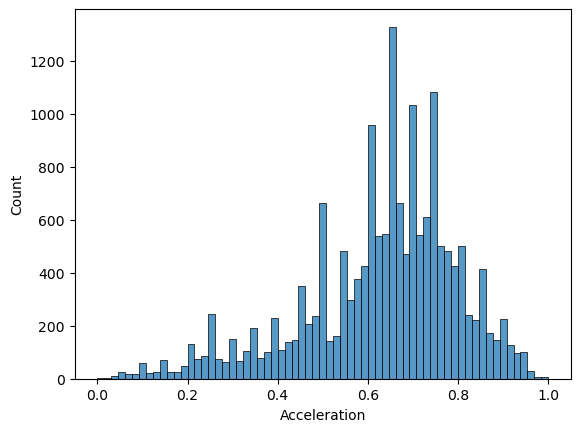

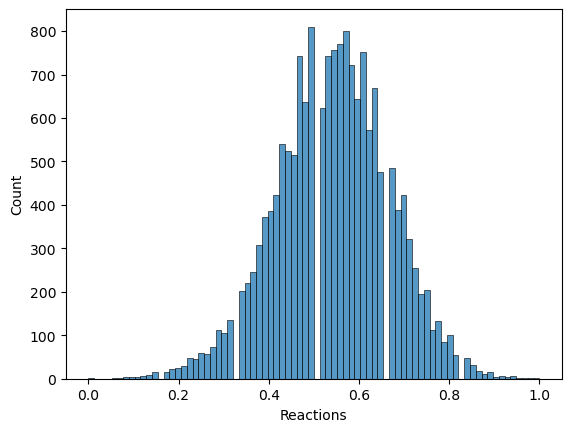

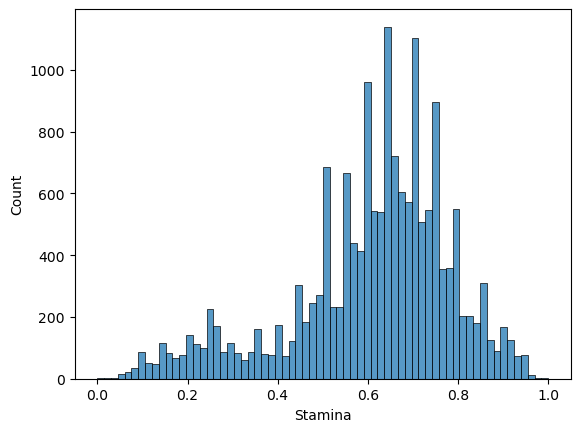

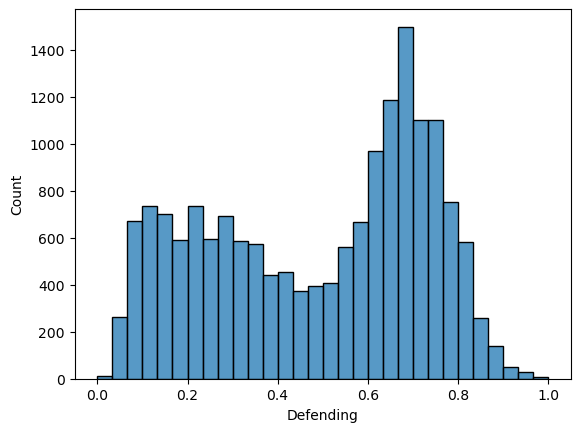

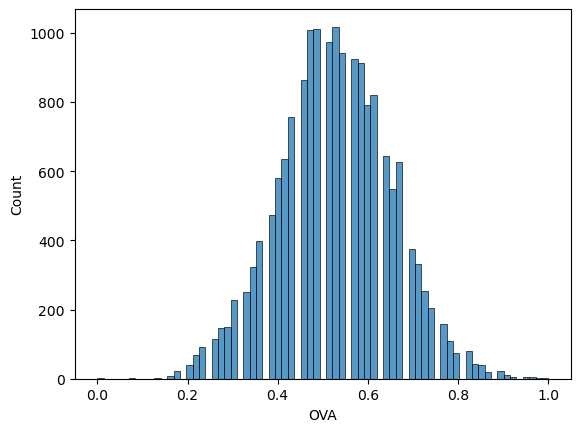

In [491]:
# Creo una variable del escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos las columnas seleccionadas
df_num_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Imprimimos el DataFrame normalizado
print(df_num_norm)

# Creamos un gráficos de distribución de las variables numéricas normalizadas
for column in df_num_norm.columns:
    sns.histplot(df_num_norm[column])
    plt.show()

Los datos categoricos no son contemplados en la Regresión Lineal, para poder utilizarlo debemos realizar la Codificacion de variables llamada Dummies. Estos convierten variables categóricas en una representación numérica. Esta técnica es especialmente útil cuando se trabaja con algoritmos de aprendizaje automático que requieren variables numéricas como entrada.

In [492]:
#Para sacar dummies vamos a usar la liberería OneHotEncoder

encoder=OneHotEncoder(handle_unknown='error', drop="first").fit(df_obj)
encoder.categories_
encoded=encoder.transform(df_obj).toarray()

# Obtengo los nombres de características de las variables codificadas
feature_names = encoder.get_feature_names_out(df_obj.columns)

# Convierto la matriz codificada en un DataFrame con nombres de columna
X_cat_encoded = pd.DataFrame(encoded, columns=feature_names)

# Eliminamos las columnas categoricas del DataFrame original
datatest_obj = df_obj.drop(df_obj.columns, axis=1)

# Concateno el DataFrame normalizado con el original
datatest_obj = pd.concat([datatest_obj, X_cat_encoded], axis=1)

# Visualizamos el datatest
datatest_obj

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [493]:
#Concateno el DataFrame númerico y categorico para comenzar a modelar

conc_df = pd.concat([df_num_norm, datatest_obj], axis=1)

In [494]:
# Eliminamos los outliers de las columnas de 'Age' y 'Altura' luego de concatenada con las dummies

def remove_outliers_iqr(conc_df, columns, threshold=1.5):
    for column in columns:
        if conc_df[column].dtype != 'object':
            Q1 = conc_df[column].quantile(0.25)
            Q3 = conc_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            conc_df = conc_df[(conc_df[column] >= lower_bound) & (conc_df[column] <= upper_bound)]
    return conc_df

columns_to_remove_outliers = ['Age', 'Altura']

conc_df = remove_outliers_iqr(df_num, columns_to_remove_outliers)

In [495]:
#Vemos las caracteristica del DataFrame concateneado.
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17064 entries, 0 to 17124
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17064 non-null  int64  
 1   Altura          17064 non-null  float64
 2   Weight          17064 non-null  float64
 3   Value           17064 non-null  float64
 4   Wage            17064 non-null  float64
 5   Release Clause  17064 non-null  float64
 6   Attacking       17064 non-null  int64  
 7   Crossing        17064 non-null  int64  
 8   Finishing       17064 non-null  int64  
 9   Short Passing   17064 non-null  int64  
 10  Ball Control    17064 non-null  int64  
 11  Acceleration    17064 non-null  int64  
 12  Reactions       17064 non-null  int64  
 13  Stamina         17064 non-null  int64  
 14  Defending       17064 non-null  int64  
 15  OVA             17064 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.2 MB


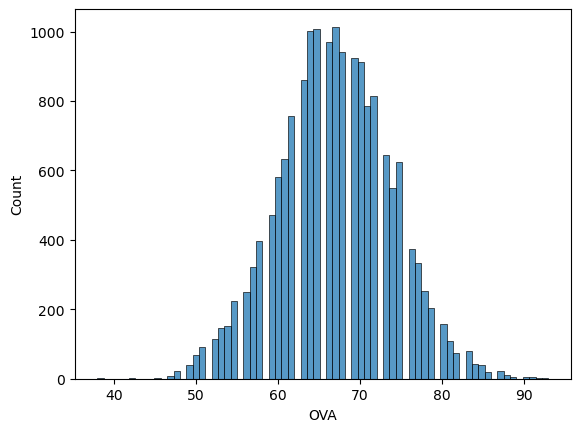

In [496]:
#Visualizamos nuestra varible objetivo para concer su distribución.
conc_df.OVA.value_counts()

sns.histplot(conc_df["OVA"])
plt.show()

In [497]:
#Luego de integrados los DataFrames realizamos la regresión lineal del modelo

Y=conc_df['OVA']
X=conc_df.drop(['OVA'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OVA   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     5467.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:55:49   Log-Likelihood:                -42067.
No. Observations:               17064   AIC:                         8.417e+04
Df Residuals:                   17048   BIC:                         8.429e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.2817      0.900     12.

In [498]:
#Realizmoa el train test
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.8281207788183582

In [499]:
#Analizamos el MSE (Mean Squared Error, Error Cuadrático Medio), RMSE (Root Mean Squared Error, Raíz del Error Cuadrático Medio)
# R2 (R-squared, R-cuadrado), ADJ R2 (Adjusted R-squared, R-cuadrado Ajustado)

mse=mean_squared_error(y_test, predictions) #varianza
print(mse)
rmse= math.sqrt(mse) #error estándar
print(rmse)

r2=r2_score(y_test, predictions) # valores de 0 a 1, cuanto más cercano a 1 mejor. 
print(r2)

n=len(X_test) #igual que r2 pero penaliza el incluir variables independientes que no aporten al modelo. 
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1)) # En caso de retirar columnas este valor puede mejorar
print(adj_r2)

8.058902449688386
2.8388206089304737
0.8281207788183582
0.8273109827232739


In [500]:
#Comparamos los resultados de nuestro modelo con los reales
dfpred=pd.DataFrame(columns=[y_test, predictions]).T
dfpred

,
OVA,
61,66.838153
76,71.234261
64,62.437974
62,61.498875
73,72.532664
...,...
53,55.901176
75,74.530386
70,71.393932


In [501]:
#Elimino las columnas de 'Value', 'Wage', 'Release Clause' quitando de esta forma el componente monetario al análisis para que pueda ser aplicado independientemente de su valor.

conc_df_value= conc_df.drop(['Value', 'Wage', 'Release Clause'], axis=1)

In [502]:
#Luego de integrados los DataFrames realizamos la regresión lineal del modelo

Q=conc_df_value['OVA']
Z=conc_df_value.drop(['OVA'], axis=1)
Z=sm.add_constant(Z)
model=sm.OLS(Q,Z).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OVA   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     5369.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:55:49   Log-Likelihood:                -43735.
No. Observations:               17064   AIC:                         8.750e+04
Df Residuals:                   17051   BIC:                         8.760e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0869      0.978      2.134

In [503]:
#Realizamos el Train-Test

Z_train, Z_test, Q_train, Q_test=train_test_split(Z, Q, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(Z_train, Q_train)
predictions=lm.predict(Z_test)
r2_score(Q_test, predictions)

0.7948412886614983

In [504]:
#Comparamos los resultados de nuestro modelo con los reales
dfpred=pd.DataFrame(columns=[Q_test, predictions]).T
dfpred

,
OVA,
61,67.924294
76,69.686891
64,63.184038
62,61.033418
73,73.285781
...,...
53,53.621830
75,75.330108
70,72.042513


In [505]:
#Analizamos el MSE (Mean Squared Error, Error Cuadrático Medio), RMSE (Root Mean Squared Error, Raíz del Error Cuadrático Medio)
# R2 (R-squared, R-cuadrado), ADJ R2 (Adjusted R-squared, R-cuadrado Ajustado)

mse=mean_squared_error(y_test, predictions) #varianza
print(mse)
rmse= math.sqrt(mse) #error estándar
print(rmse)

r2=r2_score(y_test, predictions) # valores de 0 a 1, cuanto más cercano a 1 mejor. 
print(r2)

n=len(X_test) #igual que r2 pero penaliza el incluir variables independientes que no aporten al modelo. 
p=X_test.shape[1]
adj_r2=1-((1-r2)*(n-1)/(n-p-1)) # En caso de retirar columnas este valor puede mejorar
print(adj_r2)

9.61927817693275
3.1014961191226327
0.7948412886614983
0.7938746987376419
